### Text Analysis

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
reviews = pd.read_csv("C:/Users/Super User/Desktop/Sem2 courses/CZ1015/reviews.csv")

In [3]:
reviews['comments'] = reviews['comments'].astype(str) 

In [15]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
import re
words = set(nltk.corpus.words.words())
def clean_text(text):
    
    # lower text
    text = text.lower()
    # removing Non-English words
    text = " ".join(w for w in nltk.wordpunct_tokenize(str(text)) if w.lower() in words or not w.isalpha())
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    text = " ".join(text)
    return(text)


In [16]:
clean_text("achha chalta hoon I am a boy")

'chalta hoon be boy'

In [17]:
reviews["comments_clean"] = reviews["comments"].apply(lambda x: clean_text(x))

In [18]:
reviews['comments_clean']

0        cute and cozy place perfect location to everyt...
1        kelly great room in very central location beau...
2        very spacious apartment and in great neighborh...
3        close to center and all it to offer ballet the...
4        kelly be great host and very accommodate in gr...
                               ...                        
84844    the description and of the apartment be exactl...
84845    we have an excellent stay it be clean and comf...
84846                               de lo de el para lo la
84847    very good clean and well size situate next to ...
84848    be great host check in be easy she let me in r...
Name: comments_clean, Length: 84849, dtype: object

In [19]:
sentences = pd.DataFrame(reviews['comments_clean'])
sentences_ar = np.array(sentences)


In [20]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [21]:
scores =[]

for sentence in sentences_ar:
    score = analyser.polarity_scores(sentence)
    scores.append(score)


In [22]:
scores_df = pd.DataFrame(scores)
print(scores_df)

         neg    neu    pos  compound
0      0.000  0.472  0.528    0.7717
1      0.000  0.584  0.416    0.9867
2      0.044  0.766  0.189    0.8625
3      0.000  0.776  0.224    0.8655
4      0.000  0.624  0.376    0.9782
...      ...    ...    ...       ...
84844  0.031  0.863  0.106    0.8653
84845  0.000  0.749  0.251    0.8658
84846  0.000  1.000  0.000    0.0000
84847  0.105  0.706  0.189    0.7245
84848  0.021  0.696  0.283    0.9438

[84849 rows x 4 columns]


In [23]:
reviews['scores']=scores_df['compound']
y=reviews['scores']
y=((y+1)/2)*100
reviews['scores']=y
reviews['scores']

0        88.585
1        99.335
2        93.125
3        93.275
4        98.910
          ...  
84844    93.265
84845    93.290
84846    50.000
84847    86.225
84848    97.190
Name: scores, Length: 84849, dtype: float64

In [56]:
bad_review = pd.DataFrame(reviews["comments"][reviews['scores']<=30])
bad_review

,comments
404,Es war wundervoll bei Sean und seiner Familie....
458,"Sean, Carla & Sohn waren wirklich ganz tolle G..."
940,The apartment was neat and well located in th...
1253,Location is directly below major freeway #5. ...
1327,Leah was very responsive and attentive. When I...
...,...
83252,The apartment was clean but rather depressing....
83496,Pros: I got lots of privacy. The room was clea...
83953,Barbara und Michael empfingen uns mit offenen ...
84346,"Following the last review, however, there are ..."


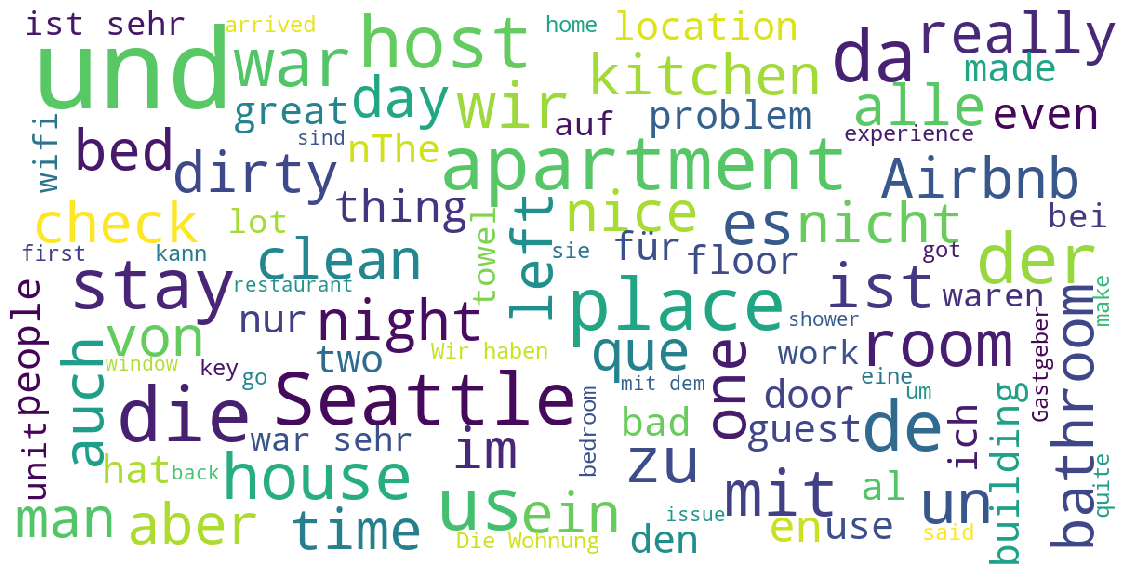

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 100,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(np.array(bad_review))

In [60]:
good_review = pd.DataFrame(reviews["comments"][reviews['scores']>=95])
good_review

,comments
1,Kelly has a great room in a very central locat...
4,Kelly was a great host and very accommodating ...
5,"Kelly was great, place was great, just what I ..."
6,Kelly was great! Very nice and the neighborhoo...
7,hola all bnb erz - Just left Seattle where I h...
...,...
84839,"The apartment was clean, tidy and as described..."
84840,We were with 7 people in rebecca's two 2-bed a...
84842,We loved how close it was to the Convention Ce...
84843,Comfortability upon arrival and everything wit...


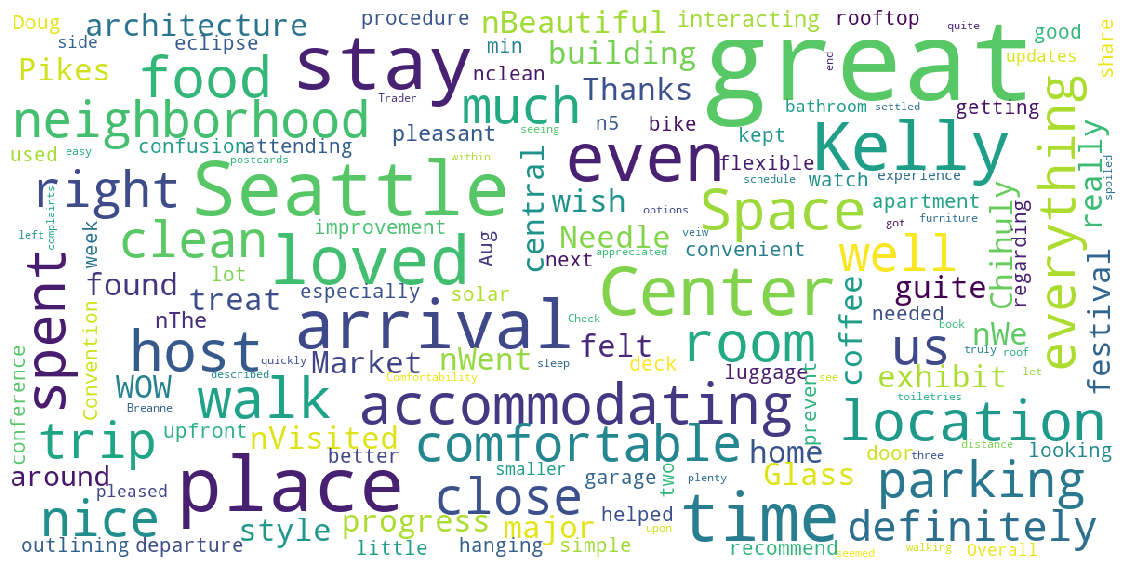

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 150,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(np.array(good_review))